\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}
\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center}

# 1. {-}

## (a) {-}

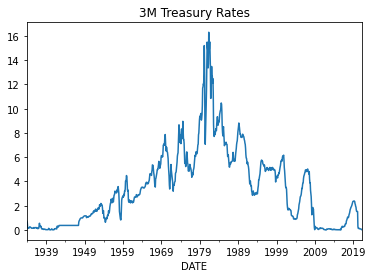

In [10]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(1934, 1, 1)
end = datetime.datetime(2021, 3, 1)

tb3ms = web.DataReader('TB3MS', 'fred', start, end)
tb3ms.plot(legend=None, title='3M Treasury Rates')
pass

## (b) {-}

In [2]:
import numpy as np
import statsmodels.tsa.api as smt

smt.stattools.adfuller(np.diff(tb3ms.values.ravel(), n=0))

(-1.99768609451749,
 0.2875885868267768,
 21,
 1025,
 {'1%': -3.43674585579594,
  '5%': -2.8643638720413227,
  '10%': -2.5682735516954196},
 532.4445434006693)

In [40]:
smt.stattools.adfuller(np.diff(tb3ms.values.ravel(), n=1))

(-7.807198416577612,
 7.228526169719172e-12,
 20,
 1025,
 {'1%': -3.43674585579594,
  '5%': -2.8643638720413227,
  '10%': -2.5682735516954196},
 535.0645589781107)

## (c) {-}

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import statsmodels.tsa.api as smt

y = np.diff(tb3ms.values.ravel(), n=1)
res = smt.stattools.arma_order_select_ic(y, ic=['aic', 'bic'], trend='nc')
print('AIC min order: ', res.aic_min_order)
print('BIC min order: ', res.bic_min_order)

AIC min order:  (4, 2)
BIC min order:  (3, 2)


## (d) {-}

In [23]:
from statsmodels.tsa.arima_model import ARMA
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

def tsplot(ts, title, acf_ylim=(-0.2, 0.2)):
    fig = plt.figure(figsize=(10, 5))
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
    pacf_ax = plt.subplot2grid(layout, (1,1))
    acf_ax = plt.subplot2grid(layout, (1,0))

    Series(ts).plot(ax=ts_ax)
    smt.graphics.plot_acf(ts, ax=acf_ax)
    smt.graphics.plot_pacf(ts, ax=pacf_ax)
    ts_ax.set(title=title)
    pacf_ax.set(ylim=acf_ylim)
    acf_ax.set(ylim=acf_ylim)

    plt.tight_layout()
    plt.show()

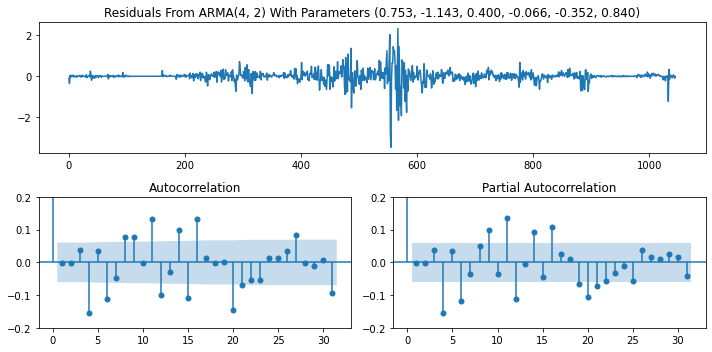

In [17]:
model42 = ARMA(y, (4, 2)).fit(trend='nc', disp=0)
tsplot(ts=model42.resid, title="Residuals From ARMA(4, 2) With Parameters (%s, %s, %s, %s, %s, %s)"%tuple('%.3f'%param for param in model42.params))

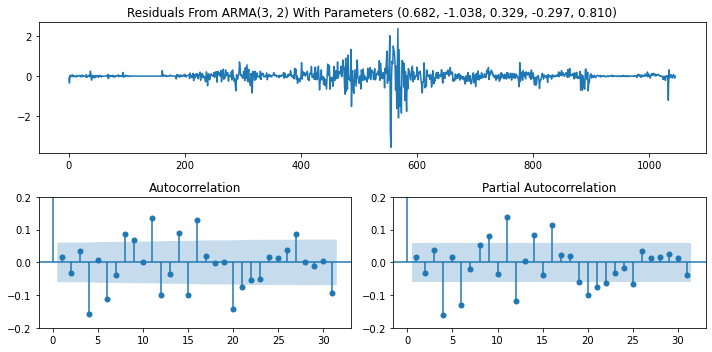

In [18]:
model32 = ARMA(y, (3, 2)).fit(trend='nc', disp=0)
tsplot(ts=model32.resid, title="Residuals From ARMA(3, 2) With Parameters (%s, %s, %s, %s, %s)"%tuple('%.3f'%param for param in model32.params))

In [19]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.8f'%x)
pd.merge(acorr_ljungbox(model42.resid, lags=10, return_df=True), acorr_ljungbox(model42.resid, lags=10, return_df=True), 
         left_index=True, right_index=True, suffixes=(' (4, 2)', ' (3, 2)'))

,"lb_stat (4, 2)","lb_pvalue (4, 2)","lb_stat (3, 2)","lb_pvalue (3, 2)"
1,0.00175712,0.96656408,0.00175712,0.96656408
2,0.00396460,0.99801966,0.00396460,0.99801966
3,1.41975431,0.70091082,1.41975431,0.70091082
4,26.71571571,0.00002269,26.71571571,0.00002269
5,27.88686461,0.00003830,27.88686461,0.00003830
6,40.83172156,0.00000031,40.83172156,0.00000031
7,43.16696096,0.00000031,43.16696096,0.00000031
8,49.30143285,0.00000006,49.30143285,0.00000006
9,55.71756196,0.00000001,55.71756196,0.00000001
10,55.71901170,0.00000002,55.71901170,0.00000002


In [20]:
tb3ms.head(5)

,TB3MS
DATE,
1934-01-01,0.72000000
1934-02-01,0.62000000
1934-03-01,0.24000000
1934-04-01,0.15000000
1934-05-01,0.16000000


# 2. {-}

## (a)(c) {-}

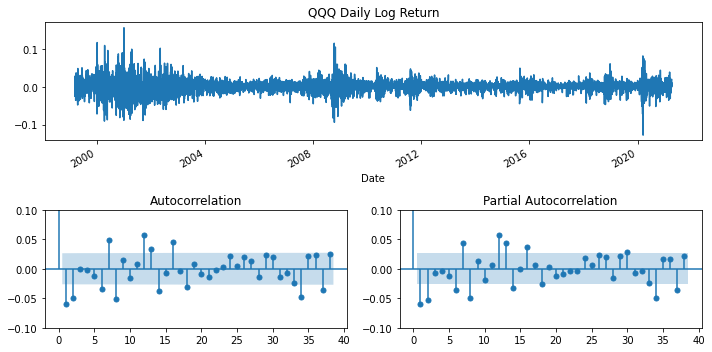

In [24]:
import pandas_datareader as pdr
import numpy as np

start = '1990-01-01'
end = '2021-04-09'
adjclose = pdr.get_data_yahoo('QQQ', start, end)['Adj Close']
logret = np.log(adjclose/adjclose.shift(1)).dropna()

tsplot(logret, 'QQQ Daily Log Return', acf_ylim=(-0.1, 0.1))

## (b) {-}

In [18]:
import numpy as np
import statsmodels.tsa.api as smt

smt.stattools.adfuller(np.diff(logret.values.ravel(), n=0))

(-12.731858497381559,
 9.338280133804948e-24,
 33,
 5523,
 {'1%': -3.431534563080626,
  '5%': -2.8620634597003414,
  '10%': -2.5670486363571245},
 -29093.4962398692)

## (d) {-}

In [27]:
res = smt.stattools.arma_order_select_ic(logret, ic=['aic', 'bic'], trend='nc')
print('AIC min order: ', res.aic_min_order)
print('BIC min order: ', res.bic_min_order)

AIC min order:  (4, 2)
BIC min order:  (0, 2)


## (e) {-}

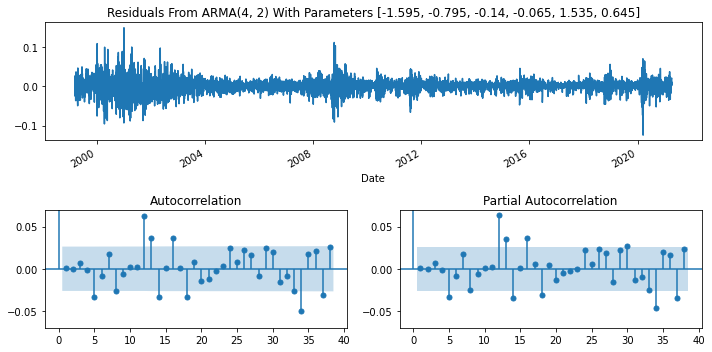

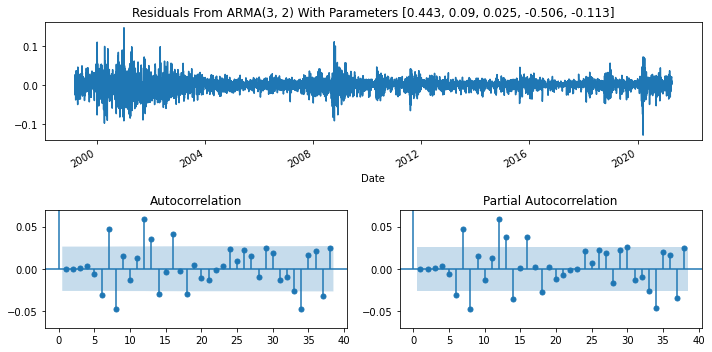

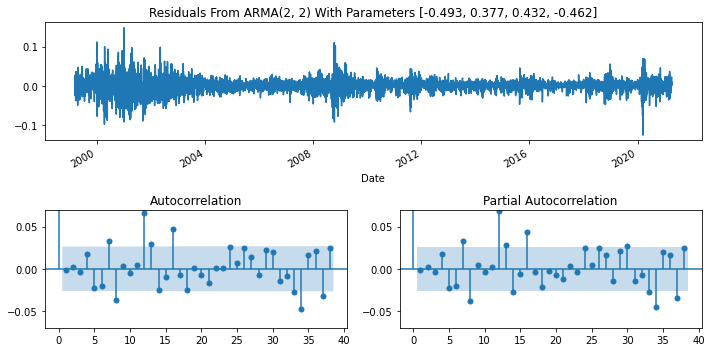

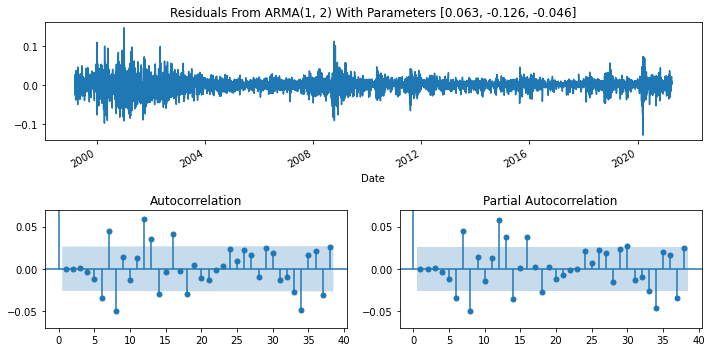

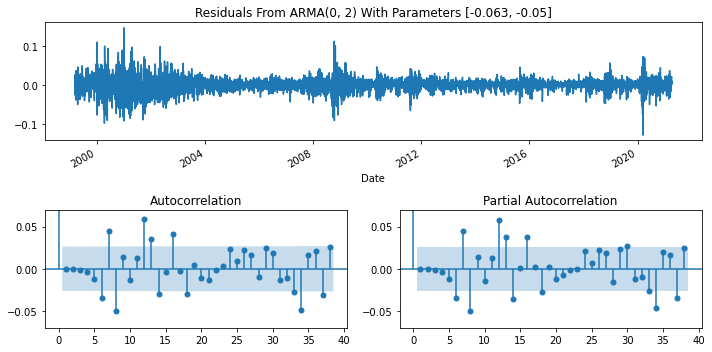

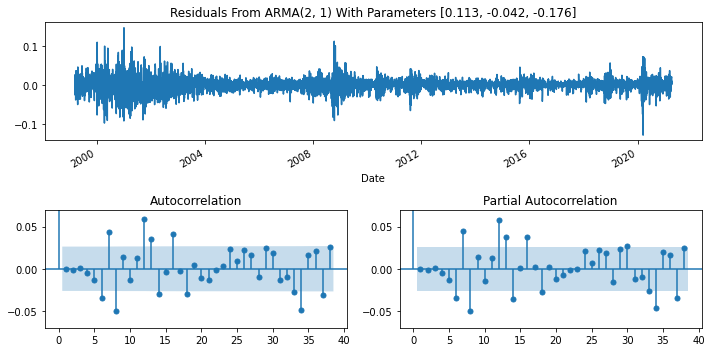

In [27]:
from IPython.display import Markdown, display

for p, q in [(4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (2, 1)]:
    model = ARMA(logret, (p, q)).fit(trend='nc', disp=0)
    tsplot(ts=model.resid, title=f"Residuals From ARMA{(p, q)} With Parameters {[round(param, 3) for param in model.params.values]}", acf_ylim=(-0.07, 0.07))
    print()

In [30]:
import statsmodels.tsa.api as smt

model22 = ARMA(logret, (2, 2)).fit(trend='nc', disp=0)
smt.stattools.adfuller(model22.resid)

(-12.703622077689603,
 1.0667058383416397e-23,
 33,
 5523,
 {'1%': -3.431534563080626,
  '5%': -2.8620634597003414,
  '10%': -2.5670486363571245},
 -29092.474132724325)

In [32]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(model22.resid, return_df=True)

,lb_stat,lb_pvalue
1,0.01388884,0.90618576
2,0.03788242,0.98123705
3,0.12491037,0.98868902
4,1.79326834,0.77371372
5,4.79520146,0.44138201
6,6.99095394,0.32168458
7,12.94086583,0.07356236
8,20.63918397,0.00817024
9,20.71823180,0.01396200
10,20.84223673,0.02222092


# 3. {-}

The estimated model is 
\begin{align*}
Y_t &= 100.1 + 0.5 Y_{t-1} + 0.1 Y_{t-2} + \epsilon_t, 
\end{align*}
where $\epsilon_t$ is a white noise so $E[\epsilon_t] = 0$ for all $t$.
Plugging in $t=n+1$ we obtain 
\begin{align*}
Y_{n+1} &= 100.1 + 0.5 Y_{n} + 0.1 Y_{n-1} + \epsilon_{n+1} \\
&= 100.1 + 0.5\times 102.3 + 0.1\times 99.5 + \epsilon_{n+1}. 
\end{align*}
The best forecast of $Y_{n+1}$ is its expectation (conditional on $\mathcal F_{n}$)
\begin{align*}
E[100.1 + 0.5\times 102.3 + 0.1\times 99.5 + \epsilon_{n+1}] = 100.1 + 0.5\times 102.3 + 0.1\times 99.5 = 161.2, 
\end{align*}
which we denote by $\hat Y_{n+1}$.


Now in the estimated model we plug in $t=n+2$ to obtain
\begin{align*}
Y_{n+2} &= 100.1 + 0.5 Y_{n+1} + 0.1 Y_{n} + \epsilon_{n+2} \\
&= 100.1 + 0.5 Y_{n+1} + 0.1\times 102.3 + \epsilon_{n+2}. 
\end{align*}
The best forecast of $Y_{n+2}$ is
\begin{align*}
E[Y_{n+2} | \mathcal F_{n}] &= E[100.1 + 0.5 Y_{n+1} + 0.1\times 102.3 + \epsilon_{n+2} | \mathcal F_{n}]\\
&= 100.1 + 0.5 E[Y_{n+1}| \mathcal F_{n}]  + 0.1\times 102.3 + E[\epsilon_{n+2} | \mathcal F_{n}]\\
&= 100.1 + 0.5\times 161.2 + 0.1\times 102.3 = 190.93, 
\end{align*}
which we denote by $\hat Y_{n+2}$.
This is equivalent to just plugging in previous forecasts to the estimated model and set $\epsilon_{n+2}$ to zero. 


Similarly, we can get the best forecast of $Y_{n+3}$ as follows: 
\begin{align*}
\hat Y_{n+3} &= 100.1 + 0.5 \hat Y_{n+2} + 0.1 \hat Y_{n+1}\\
&= 100.1 + 0.5 \times 190.93 + 0.1 \times 161.2 = 211.685.
\end{align*}

# 4. {-}

The estimated model is 
\begin{align*}
Y_t &= \hat\mu + \epsilon_t + \hat\theta_1\epsilon_{t-1} + \hat\theta_2\epsilon_{t-2}\\
&= 45 + \epsilon_t + 0.3\epsilon_{t-1} - 0.15\epsilon_{t-2}.
\end{align*}
Plugging in $t=n+1$, we obtain
\begin{align*}
Y_{n+1} = 45 + \epsilon_{n+1} + 0.3\epsilon_{n} - 0.15\epsilon_{n-1}.
\end{align*}
The best forecasts of $Y_{n+1}$ is 
\begin{align*}
\hat Y_{n+1} = E[Y_{n+1} | \mathcal F_n] = 45 + E[\epsilon_{n+1} |\mathcal F_n] + E[0.3\epsilon_{n} - 0.15\epsilon_{n-1} | \mathcal F_n]
\end{align*}
Given the filtration $\mathcal F_n$, we have the realization $\hat\epsilon_{n}=1.5$ and $\hat\epsilon_{n-1}=-4.3$, and we also know $E[\epsilon_{n+1} |\mathcal F_n] = 0$ as $\epsilon_t$ is a white noise process. Thus we have
\begin{align*}
\hat Y_{n+1} = 45 + 0.3\times 1.5 + 0.15\times 4.3 = 46.095.
\end{align*}


To find the forecast of $Y_{n+2}$, plug $t=n+2$ into the estimated model to obtain
\begin{align*}
Y_{n+2} = 45 + \epsilon_{n+2} + 0.3\epsilon_{n+1} - 0.15\epsilon_{n}.
\end{align*}
With the realization $\hat\epsilon_{n}=1.5$ and the best estimates $\hat\epsilon_{n+2}=\hat\epsilon_{n+1}=0$, we have 
\begin{align*}
\hat Y_{n+2} = 45 - 0.15\times 1.5 = 44.775.
\end{align*}

